<a href="https://colab.research.google.com/github/abhetu/NumericalAnalysis/blob/main/Newton's_Divided_Differences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 import numpy as np

In [23]:
x = [0,8,3,4,1]
y = [8,0,2,6,12]
n = len(x)
A = np.array([[0.0]* n for _ in range(n)])

for i in range(0,n):
  print(i)
  A[i][0] = y[i]

for j in range(1,n):
  for i in range(0, n-j):
    A[i][j] = (A[i+1][j-1] - A[i][j-1])/(x[i+j]-x[i])

print(A)

0
1
2
3
4
[[ 8.         -1.          0.2        -0.325      -0.26071429]
 [ 0.         -0.4        -1.1        -0.58571429  0.        ]
 [ 2.          4.          3.          0.          0.        ]
 [ 6.         -2.          0.          0.          0.        ]
 [12.          0.          0.          0.          0.        ]]


In [24]:
import sympy as sp
x_sym = sp.Symbol('x')
polynomial = A[0][n-1]

for i in range(n-2,-1,-1):
  polynomial = A[0][i] + (x_sym - x[i])*polynomial

print(polynomial)
print(sp.expand(polynomial))

x*((x - 8)*((0.717857142857143 - 0.260714285714286*x)*(x - 3) + 0.2) - 1.0) + 8.0
-0.260714285714286*x**4 + 3.58571428571428*x**3 - 13.9535714285714*x**2 + 14.6285714285714*x + 8.0


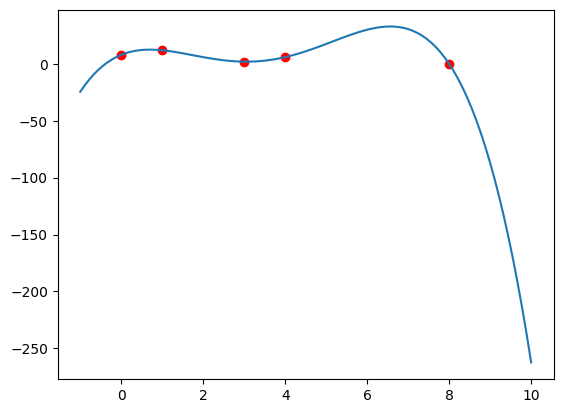

In [25]:
import matplotlib.pyplot as plt

x_vals = np.linspace(-1, 10, 100)
y_vals = [polynomial.subs(x_sym, val) for val in x_vals]

plt.plot(x_vals, y_vals)
plt.scatter(x, y, color='red')
plt.show()

QUESTION NO.1


In [26]:
# Given data points
x = [1, 2, 3, -4, 5]
y = [2, 48, 272, 1182, 2262]

n = len(x)
A = np.zeros((n, n))
A[:, 0] = y

for j in range(1, n):
    for i in range(n - j):
        A[i][j] = (A[i+1][j-1] - A[i][j-1]) / (x[i+j] - x[i])

# Generate the Newton interpolating polynomial
x_sym = sp.Symbol('x')
polynomial = A[0, 0]

for i in range(1, n):
    term = A[0, i]
    for j in range(i):
        term *= (x_sym - x[j])
    polynomial += term

# Expand for a cleaner expression
expanded_polynomial = sp.expand(polynomial)

# Evaluate p(-1) and verify the result
p_neg1 = expanded_polynomial.subs(x_sym, -1)

print("Newton Interpolating Polynomial:")
print(expanded_polynomial)
print(f"p(-1) = {p_neg1}")  # Should print 12 if correct


Newton Interpolating Polynomial:
4.0*x**4 - 2.0*x**3 + 1.0*x**2 - 3.0*x + 2.0
p(-1) = 12.0000000000000


Question No. 2

Newton Form Coefficients: [ 7.85398163e-01  3.94791120e-01 -1.46081131e-01  4.24357369e-02
 -9.99896611e-03  1.93348734e-03 -3.02947549e-04  3.59311603e-05
 -2.27131833e-06 -2.85026534e-07  1.37916618e-07]
Max Error: 0.1743515966871625


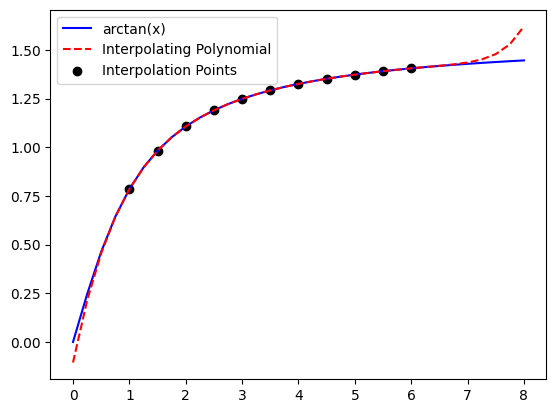

In [27]:
# Function and interpolation points
f = lambda x: np.arctan(x)
x_interp = np.linspace(1, 6, 11)
y_interp = f(x_interp)

# Compute divided differences
def divided_differences(x, y):
    n = len(y)
    coef = np.copy(y).astype(float)
    for j in range(1, n):
        coef[j:] = (coef[j:] - coef[j-1]) / (x[j:] - x[j-1])
    return coef

# Construct Newton polynomial
coeffs = divided_differences(x_interp, y_interp)
x_sym = sp.Symbol('x')
poly = sum(coeffs[i] * sp.prod([(x_sym - x_interp[j]) for j in range(i)]) for i in range(len(coeffs)))

# Print coefficients
print("Newton Form Coefficients:", coeffs)

# Evaluate and compare at 33 points
x_test = np.linspace(0, 8, 33)
y_actual = f(x_test)
y_poly = np.array([poly.subs(x_sym, val) for val in x_test], dtype=float)

# Compute error and plot
error = np.abs(y_actual - y_poly)
print(f"Max Error: {np.max(error)}")

plt.plot(x_test, y_actual, label="arctan(x)", color='blue')
plt.plot(x_test, y_poly, '--', label="Interpolating Polynomial", color='red')
plt.scatter(x_interp, y_interp, color='black', label="Interpolation Points")
plt.legend()
plt.show()


Newton Form Coefficients: [1.00000000e+00 1.10701379e+00 6.12739767e-01 2.26103791e-01
 6.25750036e-02 1.38542784e-02 2.55614621e-03 4.04241300e-04
 5.59375869e-05 6.88040875e-06 7.61670793e-07]
Max Error: 6.374536454245572e-10


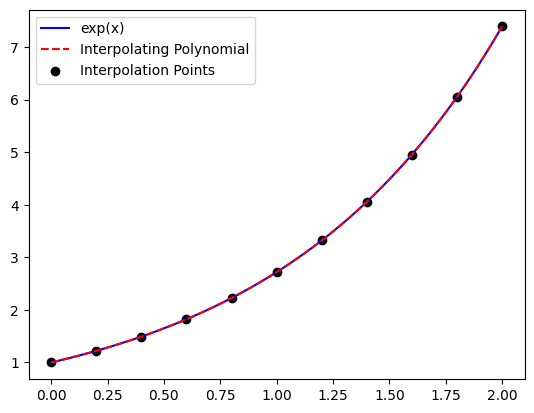

In [28]:
# Function to compute divided differences
def Coef(x, y):
    """Compute the divided difference coefficients for Newton interpolation."""
    n = len(y)
    coef = np.copy(y).astype(float)
    for j in range(1, n):
        coef[j:] = (coef[j:] - coef[j-1]) / (x[j:] - x[j-1])
    return coef

# Construct Newton interpolating polynomial
def newton_poly(x_data, coeffs):
    x_sym = sp.Symbol('x')
    poly = sum(coeffs[i] * sp.prod([(x_sym - x_data[j]) for j in range(i)]) for i in range(len(coeffs)))
    return sp.simplify(poly)

# Given function and interpolation points
f = lambda x: np.exp(x)
x_interp = np.linspace(0, 2, 11)  # 11 points for degree 10 polynomial
y_interp = f(x_interp)

# Compute Newton coefficients and polynomial
coeffs = Coef(x_interp, y_interp)
polynomial = newton_poly(x_interp, coeffs)

# Evaluate polynomial at 100 points
x_test = np.linspace(0, 2, 100)
y_actual = f(x_test)
y_poly = np.array([polynomial.subs(sp.Symbol('x'), val) for val in x_test], dtype=float)

# Compute error and print results
error = np.abs(y_actual - y_poly)
print("Newton Form Coefficients:", coeffs)
print(f"Max Error: {np.max(error)}")

# Plot function vs polynomial
plt.plot(x_test, y_actual, label="exp(x)", color='blue')
plt.plot(x_test, y_poly, '--', label="Interpolating Polynomial", color='red')
plt.scatter(x_interp, y_interp, color='black', label="Interpolation Points")
plt.legend()
plt.show()
